In [1]:
import numpy as np

In [2]:
arr = np.array([1,2,3])

In [3]:
print(arr)

[1 2 3]


In [4]:
print(type(arr))

<class 'numpy.ndarray'>


In [5]:
arr2  = np.array([1,2,'3'])

In [6]:
print(arr2)

['1' '2' '3']


In [7]:
arr2

array(['1', '2', '3'], dtype='<U11')

In [8]:
a  = np.arange(0,10,2)

In [9]:
a

array([0, 2, 4, 6, 8])

In [10]:
a = np.arange(10,1,-2)

In [11]:
a

array([10,  8,  6,  4,  2])

In [12]:
x = np.linspace(0,100,80, endpoint = False)
print(x)

[ 0.    1.25  2.5   3.75  5.    6.25  7.5   8.75 10.   11.25 12.5  13.75
 15.   16.25 17.5  18.75 20.   21.25 22.5  23.75 25.   26.25 27.5  28.75
 30.   31.25 32.5  33.75 35.   36.25 37.5  38.75 40.   41.25 42.5  43.75
 45.   46.25 47.5  48.75 50.   51.25 52.5  53.75 55.   56.25 57.5  58.75
 60.   61.25 62.5  63.75 65.   66.25 67.5  68.75 70.   71.25 72.5  73.75
 75.   76.25 77.5  78.75 80.   81.25 82.5  83.75 85.   86.25 87.5  88.75
 90.   91.25 92.5  93.75 95.   96.25 97.5  98.75]


In [13]:
zeros =  np.zeros((2,3))

In [14]:
zeros

array([[0., 0., 0.],
       [0., 0., 0.]])

In [15]:

# to create fake numbers in millions

In [16]:

import pandas as pd
import time

In [17]:
N_np = 100_000_000
N_pd = 100_000_000
N_py = 100_000_000

In [40]:
#numpy
start_np = time.time()
np_arr = np.arange(N_np)
np_result = np_arr * 2
end_np = time.time()
print(f"Numpy Time:{end_np - start_np: .2f} seconds")

#pandas
start_pd = time.time()
pd_arr = pd.Series(range(N_pd))
pd_result = pd_arr * 2
end_pd = time.time()
print(f"Pandas Time:{end_pd - start_pd: .2f} seconds")

#python
start_py = time.time()
py_arr = list(range(N_py))
py_result = py_arr * 2
end_py = time.time()
print(f"python Time:{end_py - start_py: .2f} seconds")



Numpy Time: 0.13 seconds
Pandas Time: 0.18 seconds
python Time: 2.72 seconds


In [42]:
arr = np.array([10,20,30,40,50,60,70,80])

In [44]:
arr

array([10, 20, 30, 40, 50, 60, 70, 80])

In [46]:
arr[0]

10

In [50]:
arr[-1]

80

In [52]:
# [20 30 40]
#[10 20 30]
#[10 30 50 70]

In [54]:
print(arr[1:4])

[20 30 40]


In [56]:
print(arr[:3])

[10 20 30]


In [58]:
print(arr[::2])

[10 30 50 70]


In [62]:
arr1 = np.array([[1,2,3],
                [4,5,6],
                [7,8,9]])

In [64]:
arr1

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [66]:
arr1.ndim

2

In [72]:
arr1[0,2]

3

In [74]:
# value 8
arr1[2,1]

8

In [76]:
arr1[1,1:]

array([5, 6])

In [82]:
arr1[2,:2]

array([7, 8])

In [84]:
arr1 * 10

array([[10, 20, 30],
       [40, 50, 60],
       [70, 80, 90]])

In [3]:
import pandas as pd
import numpy as np

# Load the data safely
file_path = 'Airbnb_Open_Data.csv'

# Read the CSV while skipping bad lines
df = pd.read_csv(file_path, low_memory=False, on_bad_lines='skip')

# 1. Clean column names properly: strip, lowercase, add underscores
df.columns = (df.columns
                .str.strip()
                .str.lower()
                .str.replace(' ', '_')   # REPLACE SPACES with underscores
                .str.replace('-', '_'))   # if any dashes also
              
# 1. Strip whitespace from column names
df.columns = df.columns.str.strip()

# 2. Drop completely empty columns
df = df.dropna(axis=1, how='all')

# 3. Drop duplicate rows
df = df.drop_duplicates()

# 4. Remove junk columns like "Unnamed: 0"
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# 5. Clean text columns properly with 'string' dtype
text_columns = df.select_dtypes(include='object').columns
for col in text_columns:
    df[col] = df[col].astype('string').str.strip()    # real string type
    df[col] = df[col].replace('', pd.NA)               # empty strings to real missing

# 6. Fix price-related columns to float
price_cols = ['price', 'service_fee', 'cleaning_fee', 'security_deposit', 'extra_people']
for col in price_cols:
    if col in df.columns:
        df[col] = (df[col]
                     .replace(r'[\$,]', '', regex=True)
                     .replace('', pd.NA)
                     .astype(float))

# 7. Force important columns to 'string'
string_cols = ['country', 'state', 'city', 'street', 'name', 'host_name']
for col in string_cols:
    if col in df.columns:
        df[col] = df[col].astype('string').str.strip()
        df[col] = df[col].replace('', pd.NA)

# 8. Standardize real date columns
# First find all columns that have 'date' in name
if 'last_review' in  df.columns:
    df['last_review'] = pd.to_datetime(df['last_review'], errors = 'coerce')

# 9. Reset index
df = df.reset_index(drop=True)


In [115]:
df.head()

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,<NA>
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,<NA>
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,<NA>,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",<NA>
3,1002755,<NA>,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,<NA>,<NA>
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",<NA>


In [ ]:
#Viz

In [ ]:
# which room type is most frequently listed on airbnb

In [121]:
room_count = df['room_type'].value_counts()

In [5]:
import matplotlib.pyplot as plt

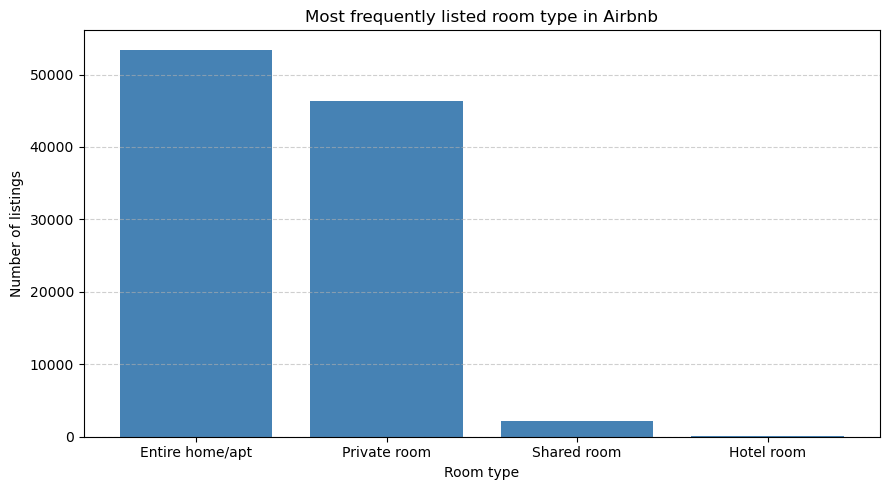

In [139]:
plt.figure(figsize=(9,5)) # set the plot size
plt.bar(room_count.index,room_count.values,color ='steelblue')
plt.title("Most frequently listed room type in Airbnb")
plt.xlabel("Room type")
plt.ylabel("Number of listings")
plt.grid(axis ='y', linestyle ='--', alpha = 0.6)
plt.tight_layout()
plt.show()

In [127]:
room_count.index

Index(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'], dtype='string', name='room_type')

In [ ]:
#what does the price distribution looks like for airbnb listings?

In [143]:
price_data = df['price'].dropna()

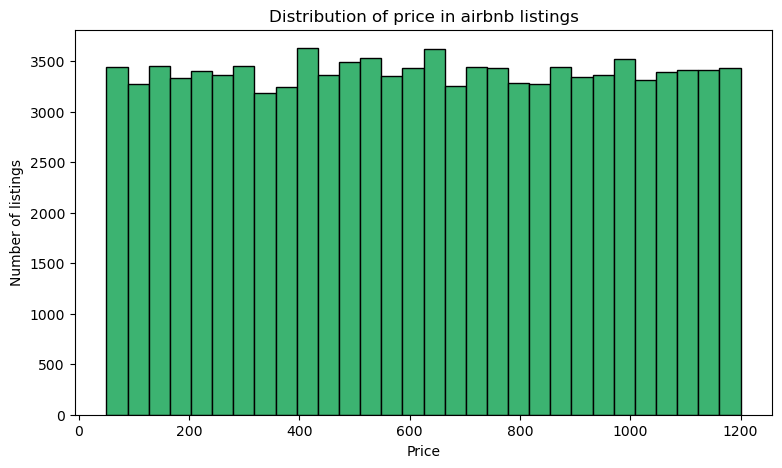

In [151]:
plt.figure(figsize=(9,5)) # set the plot size
plt.hist(price_data,bins = 30, color = 'mediumseagreen',edgecolor = 'black')
plt.title('Distribution of price in airbnb listings')
plt.xlabel('Price')
plt.ylabel('Number of listings')
plt.show()

In [153]:
# how do listings prices vary across different room types 


In [157]:
box_data = df[['room_type','price']].dropna()

<Axes: title={'center': 'price'}, xlabel='room_type'>

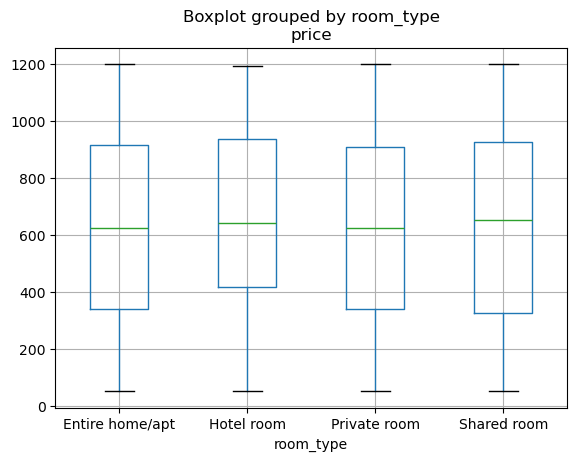

In [161]:
box_data.boxplot(by = 'room_type', column = 'price')

In [163]:
# is there a relationshop between how many reviews a listing has and its price

In [172]:
scatter_data = df[['number_of_reviews','price']].dropna()
scatter_data = scatter_data[scatter_data['number_of_reviews'] < 500]

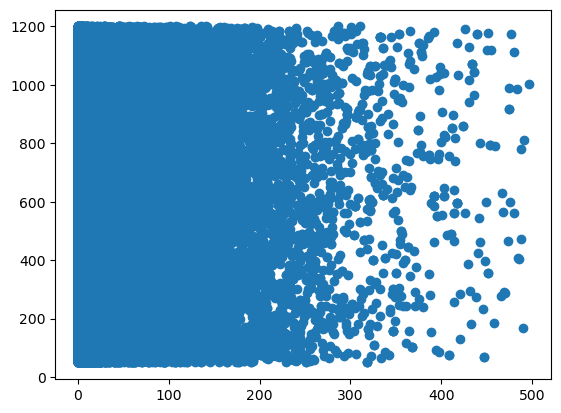

In [174]:
plt.scatter(scatter_data['number_of_reviews'],scatter_data['price'])
plt.show()

In [228]:
#how has the number of listings receiving reviews changed over time
df

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license,last_review_year
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,<NA>,2021.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,<NA>,2022.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,<NA>,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",<NA>,NaN
3,1002755,<NA>,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,<NA>,<NA>,2019.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",<NA>,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,57365208,Cozy bright room near Prospect Park,77326652202,unconfirmed,Mariam,Brooklyn,Flatbush,40.64945,-73.96108,United States,...,7.0,12.0,2019-03-27,0.44,5.0,1.0,0.0,Shoes off Clean After yourself Turn Lights and...,<NA>,2019.0
102054,57365760,Private Bedroom with Amazing Rooftop View,45936254757,verified,Trey,Brooklyn,Bushwick,40.69872,-73.92718,United States,...,1.0,19.0,2017-08-31,0.72,3.0,2.0,0.0,#NAME?,<NA>,2017.0
102055,57366313,Pretty Brooklyn One-Bedroom for 2 to 4 people,23801060917,verified,Michael,Brooklyn,Bedford-Stuyvesant,40.67810,-73.90822,United States,...,2.0,50.0,2019-06-26,3.12,4.0,2.0,235.0,* Check out: 10am * We made an effort to keep ...,<NA>,2019.0
102056,57366865,Room & private bathroom in historic Harlem,15593031571,unconfirmed,Shireen,Manhattan,Harlem,40.81248,-73.94317,United States,...,2.0,0.0,NaT,NaN,1.0,1.0,0.0,Each of us is working and/or going to school a...,<NA>,NaN


In [9]:
df['last_review_year'] = df['last_review'].dt.year

In [11]:
df_review = df[['last_review']].dropna()
df_review['last_review'] = pd.to_datetime(df_review['last_review'])

In [15]:
#count how many reviews per month
reviews_count = df_review['last_review'].dt.to_period('M').value_counts()

In [17]:
reviews_count

last_review
2019-06    21396
2019-07     7691
2019-05     6485
2022-02     5658
2022-01     4064
           ...  
2040-06        1
2025-06        1
2024-08        1
2026-03        1
2058-06        1
Freq: M, Name: count, Length: 116, dtype: int64

In [19]:
reviews_count.index = reviews_count.index.to_timestamp()

In [21]:
reviews_count

last_review
2019-06-01    21396
2019-07-01     7691
2019-05-01     6485
2022-02-01     5658
2022-01-01     4064
              ...  
2040-06-01        1
2025-06-01        1
2024-08-01        1
2026-03-01        1
2058-06-01        1
Name: count, Length: 116, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

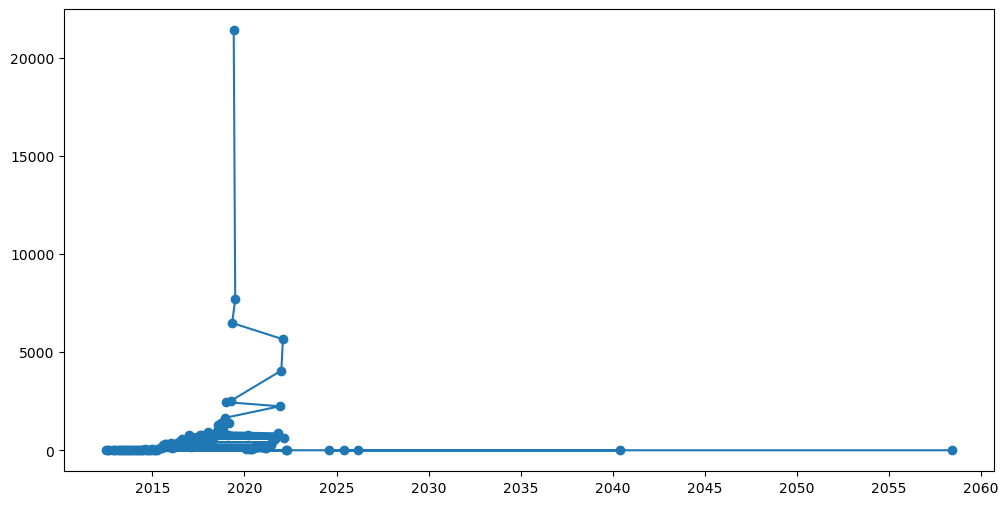

In [23]:
plt.figure(figsize=(12,6))
plt.plot(reviews_count.index,reviews_count.values, marker = 'o')
plt.show

🧾 Explanation of the Earlier Issues:
Unsorted Index:

value_counts() returns results in descending order by default, not chronologically.

Plotting unsorted datetime indices leads to lines zigzagging across time.

Future Dates or Outliers:

Some dates like 2058 or 2040 skew the x-axis and compress real data.

No Smoothing:

Review counts can vary heavily month to month, causing a jagged plot.

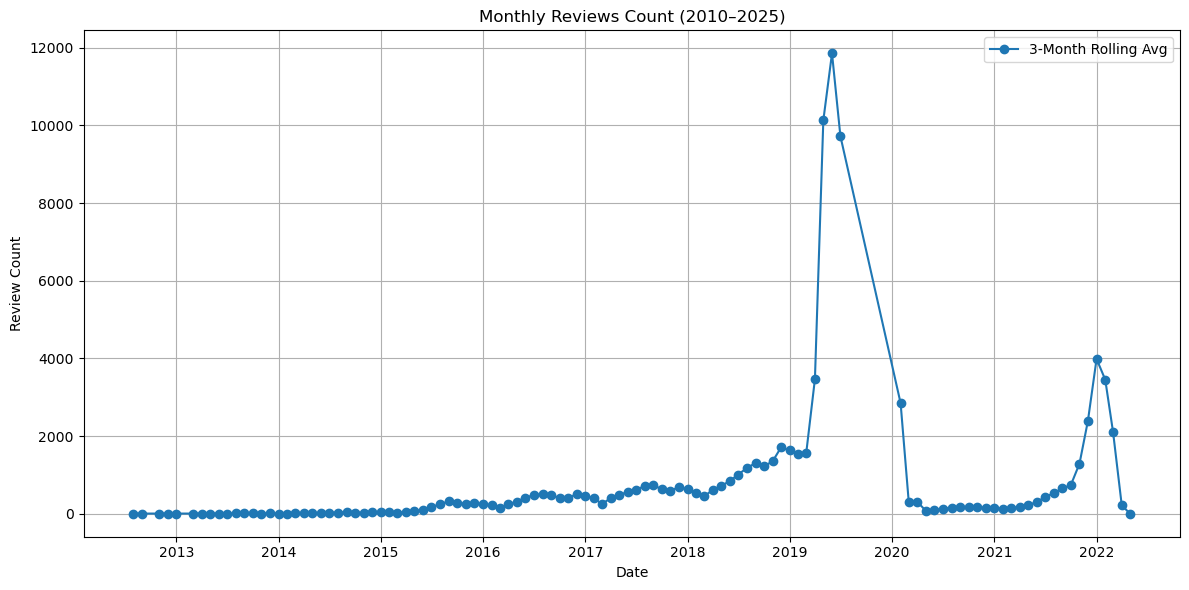

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Parse last_review column properly and drop invalid/missing entries
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')  # Converts invalid dates to NaT
df_review = df[['last_review']].dropna()

# Step 2: Count reviews per month (using Period for grouping)
reviews_count = df_review['last_review'].dt.to_period('M').value_counts()

# Step 3: Convert PeriodIndex to TimestampIndex for plotting
reviews_count.index = reviews_count.index.to_timestamp()

# 🔧 Why this helps:
# Before: value_counts() gave dates in descending order, which made the line plot jump back and forth.
# Now: we sort the index chronologically to draw a correct time series.

# Step 4: Sort the index to fix zigzag lines
reviews_count = reviews_count.sort_index()

# Step 5: Filter to a clean time window (removes outliers like 2040, 2058, etc.)
filtered_reviews = reviews_count[(reviews_count.index >= '2010-01') & (reviews_count.index <= '2025-01')]

# Step 6: Optional smoothing using rolling average
smoothed_reviews = filtered_reviews.rolling(window=3, center=True).mean()

# Step 7: Plot the cleaned and smoothed data
plt.figure(figsize=(12, 6))
plt.plot(smoothed_reviews.index, smoothed_reviews.values, marker='o', label='3-Month Rolling Avg')

plt.title("Monthly Reviews Count (2010–2025)")
plt.xlabel("Date")
plt.ylabel("Review Count")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Numpy Cheetsheet:
https://media.datacamp.com/legacy/image/upload/v1676302459/Marketing/Blog/Numpy_Cheat_Sheet.pdf

Pandas Cheetsheet:
https://media.datacamp.com/legacy/image/upload/v1676302204/Marketing/Blog/Pandas_Cheat_Sheet.pdf

Matplotlib.pyplot Cheetsheet:
https://media.datacamp.com/legacy/image/upload/v1676360378/Marketing/Blog/Matplotlib_Cheat_Sheet.pdf
    